###  Problem statement - Loan Approval Prediction Using Random Forest Classifier

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,\
                            precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

#### Step 1 : Data Gathering

In [2]:
df = pd.read_csv("C:/Users/Ranesh/OneDrive/Desktop/Machine Learning/finance_loan_approval-main/finance_loan_approval-main/Finance.csv")
df.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

###  Step 2:EDA - Read and Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

#### Percentage of Missing value in Every Column

In [5]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Step 3: Missing value imputation

#### 1.Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

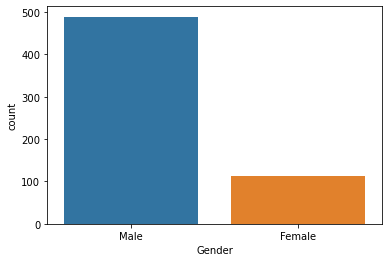

In [6]:
sns.countplot(x = df['Gender'])

###### Mode Imputation: Most Occurring value of a particular Column specifically for Categorical Column

In [7]:
df['Gender'].mode()[0] 

'Male'

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

#### 2.Married

<AxesSubplot:xlabel='Married', ylabel='count'>

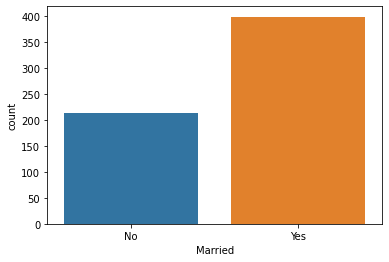

In [9]:
sns.countplot(x= df['Married'])

In [10]:
df['Married'].mode()[0]

'Yes'

In [11]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

#### 3.Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

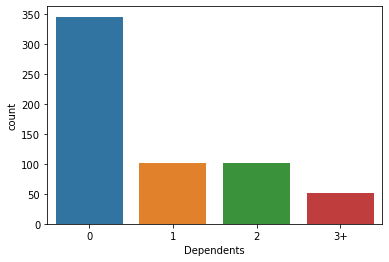

In [12]:
sns.countplot(x=df['Dependents'])

In [13]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
df['Dependents'].mode()[0]

'0'

In [15]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

### 4.Self_Employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

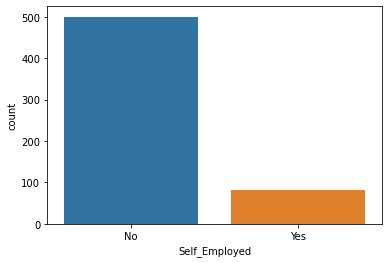

In [16]:
sns.countplot(x = df['Self_Employed'])

In [17]:
df['Self_Employed'].mode()[0]

'No'

In [18]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### 5.LoanAmount

###### Median Imputation :: Specifically for Numerical values not impacted by Outliers 

In [20]:
df['LoanAmount'].median()

128.0

In [21]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

#### 6.Loan_Amount_Term

In [22]:
df['Loan_Amount_Term'].median()

360.0

In [23]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

#### 7.Credit_History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

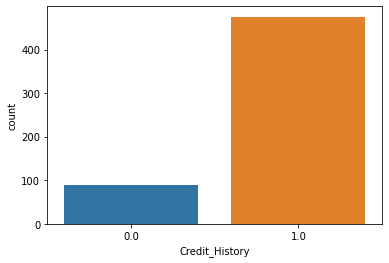

In [24]:
sns.countplot(x = df['Credit_History'])

In [25]:
df['Credit_History'].mode()[0]

1.0

In [26]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [27]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Step 4 : Feature Creation

In [28]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [29]:
df.replace({
    "Loan_Status": {'N': 0, 'Y': 1},
    "Gender": {'Male': 0, 'Female': 1},
    "Education": {'Not Graduate': 0, 'Graduate': 1},
    "Married": {'No': 0, 'Yes': 1},
    "Self_Employed": {'No': 0, 'Yes': 1}
}, inplace=True)

In [30]:
df

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001002       0        0          0          1              0   
1    LP001003       0        1          1          1              0   
2    LP001005       0        1          0          1              1   
3    LP001006       0        1          0          0              0   
4    LP001008       0        0          0          1              0   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       1        0          0          1              0   
610  LP002979       0        1         3+          1              0   
611  LP002983       0        1          1          1              0   
612  LP002984       0        1          2          1              0   
613  LP002990       1        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area  Loan_Status  
0               1.0         Urban            1  
1               1.0         Rural            0  
2               1.0         Urban            1  
3               1.0         Urban            1  
4               1.0         Urban            1  
..              ...           ...          ...  
609             1.0         Rural            1  
610             1.0         Rural            1  
611             1.0         Urban            1  
612             1.0         Urban            1  
613             0.0     Semiurban            0  

[614 rows x 13 columns]

### Step 5 : Train Test split the data

In [31]:
def train_test_split_and_features(df):
    y = df["Loan_Status"]
    x = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
    x = pd.get_dummies(data = x, columns = ["Property_Area","Dependents"])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [32]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       0        0          1              0             5849   
1       0        1          1              0             4583   
2       0        1          1              1             3000   
3       0        1          0              0             2583   
4       0        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                    0                        0                    1   
1                    1                      

### Step 6: Fit and evaluate model

In [47]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=5,\
                                            min_samples_split=0.05,\
                                            min_samples_leaf=10,\
                                            max_features='log2',\
                                            n_estimators=50,\
                                            criterion = 'entropy'
                                            )

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    random_forest_precision_score = precision_score(y_test,random_forest_predict)
    random_forest_recall_score = recall_score(y_test,random_forest_predict)
    random_forest_f1_score = f1_score(y_test,random_forest_predict)
    print("confusion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    print("Precision score of Random Forest:",random_forest_precision_score*100,'\n')
    print("Recall score of Random Forest:",random_forest_recall_score*100,'\n')
    print("f1 score of Random Forest:",random_forest_f1_score*100,'\n')
    return model

In [48]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confusion matrix
[[18 25]
 [ 1 79]]


Accuracy of Random Forest: 78.86178861788618 

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Precision score of Random Forest: 75.96153846153845 

Recall score of Random Forest: 98.75 

f1 score of Random Forest: 85.86956521739131 



### Step 7: Try different parameters to identify best ones

In [49]:
param_grid = [
  {'max_depth': [5,7,9,12,15], 'min_samples_split': [0.02,0.03,0.05,0.07,0.09,], 
'min_samples_leaf': [20,25,30,35,45],'n_estimators':[40,45,55,70,75],'criterion':['entropy','gini', 'log_loss'],
'max_features': ['sqrt', 'log2', 'None']}]

In [50]:
model = RandomForestClassifier()
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5,verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 5625 candidates, totalling 28125 fits
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, 

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; tota

[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; tota

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; tota

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; tota

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; tota

[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; tota

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; tota

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; tota

[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; tota

[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; tota

[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; tota

[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; tota

[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; tota

[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; tota

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; tota

[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; tota

[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; tota

[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; tota

[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; tota

[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; tota

[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; tota

[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; tota

[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; tota

[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; tota

[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; tota

[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; tota

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; tota

[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; tota

[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; tota

[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; tota

[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; tota

[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; tota

[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; tota

[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; tota

[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; tota

[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; tota

[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; tota

[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; tota

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; tota

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; tota

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; tota

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; tota

[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; tota

[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; tota

[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; tota

[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; tota

[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; tota

[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; tota

[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; tota

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; tota

[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; tota

[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; tota

[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; tota

[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; tota

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; tota

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=7

[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=4

[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=7

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=7

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=4

[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=7

[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=4

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=4

[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=7

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=7

[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=4

[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=7

[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=4

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=7

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=5

[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=7

[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=4

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=5

[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=7

[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=4

[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=7

[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=4

[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=4

[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=5

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=4

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=4

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=7

[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=4

[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=7

[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=5

[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=7

[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=4

[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=5

[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=7

[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=4

[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=5

[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=4

[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=5

[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=7

[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=4

[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=5

[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=7

[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=4

[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=5

[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=7

[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=4

[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=4

[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=7

[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=4

[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=4

[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=7

[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=5

[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=7

[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=5

[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=4

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/

[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/

[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/

[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/

[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/

[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/

[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/

[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/

[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/

[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/

[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/

[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/

[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/

[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/

[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/

[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/

[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/

[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/

[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/

[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/

[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/

[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/

[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/

[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/

[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/

[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/

[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/

[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/

[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/

[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/

[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/

[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/

[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/

[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/

[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/

[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/

[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/

[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/

[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/

[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/

[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/

[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/

[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/

[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/

[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/

[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/

[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/

[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/

[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/

[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/

[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/

[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/

[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/

[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/

[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/

[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/

[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/

[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s

[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s

[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s

[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s

[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s

[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s

[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s

[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s

[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s

[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s

[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s

[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s

[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=5

[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=4

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=7

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=4

[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=5

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=4

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=7

[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.03, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=5

[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=4

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=7

[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=5

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=4

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=7

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=5

[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=4

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=5

[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=4

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=7

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=5

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estimators=5

[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=7

[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=4

[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=7

[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estimators=4

[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=0.07, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=5

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=5

[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=4

[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=7

[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=5

[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=4

[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=7

[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=4

[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=5

[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=7, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=4

[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.05, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=4

[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=5

[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=7

[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=4

[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=7

[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=5

[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=25, min_samples_split=0.07, n_estimators=4

[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.02, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=30, min_samples_split=0.07, n_estimators=4

[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.02, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=35, min_samples_split=0.07, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.02, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=45, min_samples_split=0.07, n_estimators=5

[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=20, min_samples_split=0.07, n_estimators=4

[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=25, min_samples_split=0.07, n_estimators=4

[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=30, min_samples_split=0.07, n_estimators=4

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.02, n_estimators=7

[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=7

[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=4

[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=9, max_features=None, min_samples_leaf=45, min_samples_split=0.07, n_estimators=7

[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.02, n_estim

[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.07, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.02, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estim

[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.02, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.07, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.02, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.07, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.02, n_estim

[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.07, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.02, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estim

[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.02, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estim

[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estim

[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.03, n_estim

[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.03, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estim

[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estim

[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estim

[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estim

[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=12, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estim

[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.03, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=0.09, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.05, n_estim

[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.09, n_estim

[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.05, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=30, min_samples_split=0.09, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=35, min_samples_split=0.09, n_estim

[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.05, n_estim

[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=45, min_samples_split=0.09, n_estim

[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=20, min_samples_split=0.09, n_estim

[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.03, n_estim

[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=25, min_samples_split=0.09, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=30, min_samples_split=0.09, n_estim

[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.05, n_estim

[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=35, min_samples_split=0.09, n_estim

[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.05, n_estim

[CV 1/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=log2, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.02, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.05, n_estim

[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.02, n_estim

[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.05, n_estim

[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=25, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.02, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estimators=45; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.05, n_estim

[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=45; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=30, min_samples_split=0.09, n_estim

[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.05, n_estim

[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=55; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=35, min_samples_split=0.09, n_estim

[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.03, n_estimators=75; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.05, n_estim

[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=70; total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estimators=75; total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=None, min_samples_leaf=45, min_samples_split=0.09, n_estim

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini', 'log_loss'],
                          'max_depth': [5, 7, 9, 12, 15],
                          'max_features': ['sqrt', 'log2', 'None'],
                          'min_samples_leaf': [20, 25, 30, 35, 45],
                          'min_samples_split': [0.02, 0.03, 0.05, 0.07, 0.09],
                          'n_estimators': [40, 45, 55, 70, 75]}],
             verbose=5)

In [37]:
model = RandomForestClassifier()
search = RandomizedSearchCV (estimator = model, param_distributions = param_grid, cv=5,random_state=100,n_iter=10, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=75; total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, min_samples_leaf=25, min_samples_split=0.07, n_estimators=55; total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, min_sam

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [5, 7, 9, 12, 15],
                                         'max_features': ['sqrt', 'log2',
                                                          'None'],
                                         'min_samples_leaf': [20, 25, 30, 35,
                                                              45],
                                         'min_samples_split': [0.02, 0.03, 0.05,
                                                               0.07, 0.09],
                                         'n_estimators': [40, 45, 55, 70, 75]}],
                   random_state=100, verbose=5)

In [51]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1882       0.051619      0.007642         0.007255        0.007084   
2263       0.068213      0.007032         0.003321        0.006160   
1145       0.040633      0.007659         0.003365        0.006730   
21         0.039398      0.007322         0.007250        0.007078   
2377       0.054466      0.007549         0.007253        0.007081   
2022       0.051128      0.006360         0.004938        0.006394   
136        0.046361      0.001682         0.003125        0.006250   
3          0.072073      0.009077         0.008332        0.006292   
516        0.040625      0.007655         0.009375        0.007655   
1261       0.047101      0.000453         0.003126        0.006251   

     param_criterion param_max_depth param_max_features  \
1882            gini               5               sqrt   
2263            gini               7               sqrt   
1145         entropy              12               sqrt   
21           entropy               5               sqrt   
2377            gini               7               log2   
2022            gini               5               log2   
136          entropy               5               log2   
3            entropy               5               sqrt   
516          entropy               7               log2   
1261         entropy              12               log2   

     param_min_samples_leaf param_min_samples_split param_n_estimators  \
1882                     20                    0.03                 55   
2263                     20                    0.05                 70   
1145                     20                    0.09                 40   
21                       20                    0.09                 45   
2377                     20                    0.02                 55   
2022                     20                    0.09                 55   
136                      20                    0.05                 45   
3                        20                    0.02                 70   
516                      20                    0.07                 45   
1261                     20                    0.05                 45   

                                                 params  split0_test_score  \
1882  {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.848485   
2263  {'criterion': 'gini', 'max_depth': 7, 'max_fea...           0.858586   
1145  {'criterion': 'entropy', 'max_depth': 12, 'max...           0.838384   
21    {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.838384   
2377  {'criterion': 'gini', 'max_depth': 7, 'max_fea...           0.838384   
2022  {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.838384   
136   {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.848485   
3     {'criterion': 'entropy', 'max_depth': 5, 'max_...           0.848485   
516   {'criterion': 'entropy', 'max_depth': 7, 'max_...           0.848485   
1261  {'criterion': 'entropy', 'max_depth': 12, 'max...           0.828283   

      split1_test_score  split2_test_score  split3_test_score  \
1882           0.806122           0.826531           0.785714   
2263           0.806122           0.826531           0.775510   
1145           0.806122           0.826531           0.785714   
21             0.806122           0.826531           0.785714   
2377           0.806122           0.826531           0.785714   
2022           0.806122           0.826531           0.785714   
136            0.806122           0.826531           0.775510   
3              0.806122           0.826531           0.775510   
516            0.806122           0.816327           0.785714   
1261           0.806122           0.826531           0.785714   

      split4_test_score  mean_test_score  std_test_score  rank_test_score  
1882           0.806122         0.814595        0.021301                1  
2263           0.806122         0.814574   

In [52]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index =False)

In [53]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 0.03,
 'n_estimators': 55}

### Step 8: Evaluate the model with best parameters

In [54]:

model= RandomForestClassifier(max_depth=5, 
                              max_features='sqrt', 
                              min_samples_leaf=20, 
                              min_samples_split=0.03,
                              n_estimators=55,
                              criterion='gini') 
model.fit(x_train, y_train) 
y_pred_grid = model.predict(x_test) 
print(classification_report(y_pred_grid, y_test)) 
random_forest_conf_matrix = confusion_matrix(y_test, y_pred_grid)
random_forest_acc_score = accuracy_score(y_test, y_pred_grid)
random_forest_precision_score = precision_score(y_test,y_pred_grid)
random_forest_recall_score = recall_score(y_test,y_pred_grid)
random_forest_f1_score = f1_score(y_test,y_pred_grid)
print("confusion matrix")
print(random_forest_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
print("Precision score of Random Forest:",random_forest_precision_score*100,'\n')
print("Recall score of Random Forest:",random_forest_recall_score*100,'\n')
print("f1 score of Random Forest:",random_forest_f1_score*100,'\n')

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123

confusion matrix
[[18 25]
 [ 1 79]]


Accuracy of Random Forest: 78.86178861788618 

Precision score of Random Forest: 75.96153846153845 

Recall score of Random Forest: 98.75 

f1 score of Random Forest: 85.86956521739131 



In [55]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

### Step 10 : Feature importance

<BarContainer object of 16 artists>

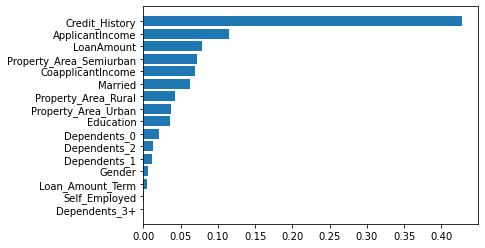

In [56]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)